# Análise da Bay Area Bike Share

## Introdução

> **Dica**: Seções citadas como esta fornecerão instruções úteis sobre como navegar e usar um notebook do iPython.

[Bay Area Bike Share](http://www.bayareabikeshare.com/) é uma empresa que oferece aluguel de bicicletas on-demand para clientes em San Francisco, Redwood City, Palo Alto, Mountain View e San Jose. Os usuários podem desbloquear bicicletas de uma variedade de estações em cada cidade, e devolvê-las em qualquer estação dentro da mesma cidade. Os usuários pagam o serviço por meio de assinatura anual ou pela compra de passes de 3 dias ou 24 horas. Os usuários podem fazer um número ilimitado de viagens. Viagens com menos de trinta minutos de duração não têm custo adicional; Viagens mais longas incorrem em taxas de horas extras.

Neste projeto, você vai se colocar no lugar de um analista de dados realizando uma análise exploratória sobre os dados. Você vai dar uma olhada em duas das principais partes do processo de análise de dados: limpeza de dados e análise exploratória. Mas antes que você comece a olhar os dados, pense algumas perguntas que você pode querer fazer sobre os dados. Considere, por exemplo, se você estivesse trabalhando para Bay Area Bike Share: que tipo de informação você gostaria de saber a fim de tomar decisões de negócios mais inteligentes? Ou você pode pensar se você fosse um usuário do serviço de compartilhamento de bicicletas. Que fatores podem influenciar a maneira como você gostaria de usar o serviço?

## Análise Exploratória de Dados 

Agora que você tem alguns dados salvos em um arquivo, vejamos algumas tendências iniciais nos dados. Algum código já foi escrito para você no script [babs_visualizations.py](babs_visualizations.py) para ajudar a resumir e visualizar os dados; Isso foi importado como as funções `usage_stats()` e `usage_plot()`. Nesta seção, vamos percorrer algumas das coisas que você pode fazer com as funções, e você usará as funções para você mesmo na última parte do projeto. Primeiro, execute a seguinte célula para carregar os dados. Depois preencha a célula abaixo com os comandos para verificar os dados básicos sobre os dados.

In [ ]:
trip_data = pd.read_csv('201309_trip_summary.csv')

In [ ]:
# TODO: preencha os campos com os dados de acordo com o print
print('Existem {:d} pontos no conjunto de dados'.format(trip_data['duration'].count()))
print('A duração média das viagens foi de {:.2f} minutos'.format(trip_data['duration']\
                                                                 .mean()))
print('A mediana das durações das viagens foi de {:.2f} minutos'.format(trip_data['duration']\
                                                                 .median()))

# TODO: verificando os quartis
duration_qtiles = trip_data['duration'].quantile([.25, .5, .75]).as_matrix()
print('25% das viagens foram mais curtas do que {:.2f} minutos'.format(duration_qtiles[0]))
print('25% das viagens foram mais compridas do que {:.2f} minutos'.format(duration_qtiles[2]))

In [ ]:
# execute este campo para verificar os seu processamento acima.
usage_stats(trip_data)

Você deve ver que há mais de 27.000 viagens no primeiro mês e que a duração média da viagem é maior do que a duração mediana da viagem (o ponto em que 50% das viagens são mais curtas e 50% são mais longas). Na verdade, a média é maior que as durações de 75% das viagens mais curtas. Isso será interessante para ver mais adiante.

Vamos começar a ver como essas viagens são divididas por tipo de inscrição. Uma maneira fácil de construir uma intuição sobre os dados é traçá-los. 

Lembre-se que o Pandas possui maneiras de plotar os gráficos diretamente de um DataFrame. Para cada tipo de dados/análises se pode usar um tipo diferente de gráfico mais apropriado para a análise que se está fazendo.

Na caixa abaixo, faça um gráfico de viagens x tipo de subscrição do tipo barras.

In [ ]:
trip_data.head(3)

In [ ]:
# TODO: plote um gráfico de barras que mostre quantidade de viagens por subscription_type
# lembrando que quando o comando .plot é usado, se pode escolher o tipo de gráfico usando 
# o parâmetro kind. Ex: plot(kind='bar')

import matplotlib.pyplot as plt

colors = ['red']
trip_data['subscription_type'].value_counts().plot(kind='bar', color = colors, alpha=.7)

plt.title('Quantidade de viagens por subscription_type')
plt.ylabel('Quantidade de viagens')
plt.xlabel('Tipo de assinatura')

Para que você possa conferir se os seus gráficos estão corretos, usaremos a função `use_plot()`. O segundo argumento da função nos permite contar as viagens em uma variável selecionada, exibindo as informações em um gráfico. A expressão abaixo mostrará como deve ter ficado o seu gráfico acima.

In [ ]:
# como o seu gráfico deve ficar. Descomente a linha abaixo caso queira rodar este comando
usage_plot(trip_data, 'subscription_type')

>*Nota*: Perceba que provavelmente o seu gráfico não ficou exatamente igual, principalmente pelo título e pelo nome dos eixos. Lembre-se, estes são detalhes mas fazem toda a diferença quando você for apresentar os gráficos que você analisou. Neste Nanodegree não focaremos nestas questões, mas tenha em mente que ter os gráficos acertados é de extrema importância.

Parece que existe 50% mais viagens feitas por assinantes (subscribers) no primeiro mês do que outro tipos de consumidores. Vamos tentar uma outra variável. Como é a distribuição da duração das viagens (trip duration)?

In [ ]:
# TODO: Faça um gráfico baseado nas durações
trip_data['duration'].hist()

In [ ]:
# rode este comando abaixo caso esteja em dúvida quanto ao resultado esperado
usage_plot(trip_data, 'duration')

Parece muito estranho, não é? Dê uma olhada nos valores de duração no eixo x. A maioria dos passeios deve ser de 30 minutos ou menos, uma vez que há taxas de excesso de tempo extra em uma única viagem. A primeira barra abrange durações de até 1000 minutos, ou mais de 16 horas. Com base nas estatísticas que obtivemos do `use_stats()`, deveríamos ter esperado algumas viagens com durações muito longas que levem a média a ser muito superior à mediana: o gráfico mostra isso de forma dramática, mas inútil.

Ao explorar os dados, muitas vezes você precisará trabalhar com os parâmetros da função de visualização para facilitar a compreensão dos dados. É aqui que os filtros vão ajudar você. Comecemos por limitar as  viagens de menos de 60 minutos.

In [ ]:
# TODO: faça um gráfico de barras para os dados com duração inferior a 60 minutos.

menor_60_min = 60
abaixo_60_min = trip_data.query('duration < @menor_60_min')
acima_60_min = trip_data.query('duration >= @menor_60_min')
abaixo_60_min['duration'].hist()

In [ ]:
# descomente a linha abaixo para verificar o gráfico esperado.
usage_plot(trip_data, 'duration', ['duration < 60'])

Isso está bem melhor! Você pode ver que a maioria das viagens têm menos de 30 minutos de duração, mas que você pode fazer mais para melhorar a apresentação. Uma vez que a duração mínima não é 0, a barra da esquerda está ligeiramente acima de 0. Nós queremos saber onde existe um limite perto dos 30 minutos, então ficará mais agradável se tivermos tamanhos de intervalos (bin sizes) e limites dos intervalos que correspondam a alguns minutos. 

Felizmente, o Pandas e o Matplotlib te dão a opção de resolver ester problemas. Uma das maneiras de fazê-lo é definindo qual o intervalo no eixo x (parâmetro range) e quantos intervalos desejamos (bins).

No campo abaixo, faça o ajuste do gráfico para que os limites das barras se encontrem nas extremidades e que as barras tenham tamanho 5 (0, 5, 10, 15, etc). Se precisar, use a [documentação](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist).

In [ ]:
# faça o gráfico ajustado que começará no 0 e terá o bin size de 5
abaixo_60_min['duration'].hist(bins=[0,5,10,15,20,25,30,35,40,45,50,55,60])

In [ ]:
# rode esta linha para verificar como deve ficar o seu gráfico
usage_plot(trip_data, 'duration', ['duration < 60'], boundary = 0, bin_width = 5)

Pequenos ajustes como este podem ser pequenos mas fazem toda a diferença na entrega de um trabalho de qualidade e com atenção aos detalhes.


# Pergunta 4

Analise o histograma do exercicio anterior e responda:

Qual o intervalo de duração com maior quantidade de viagens?


**Reposta**: <br/> É o intervalo de 10 minutos.

# Pergunta 4.1

Com base na sua resposta da pergunta anterior, conte quantas viagens existem para cada origem e destino desse intervalo de tempo. Monte uma tabela que demonstre isso. 

Qual origem e destino tem a maior quantidade de viagens?  Aproximadamente quantas viagens foram feitas nesta faixa de tempo?


 **Reposta**: <br/> De San Francisco	para San Francisco	com um total de 
 viagens de 8129 com duração de 5 à 10 minutos.

In [ ]:
cinco_min = 5
dez_min = 10

entre_5_a_10_min = trip_data.query('duration >= @cinco_min and duration <= @dez_min')
entre_5_a_10_min.drop(['duration','start_date','start_year','start_month','start_hour',\
                      'weekday','subscription_type'],axis=1, inplace=True)
entre_5_a_10_min.groupby(['start_city','end_city']).count()

## Fazendo suas Próprias Análises

Agora que você fez alguma exploração em uma pequena amostra do conjunto de dados, é hora de avançar e reunir todos os dados em um único arquivo e ver quais tendências você pode encontrar. O código abaixo usará a mesma função `summarise_data()` para processar dados. Depois de executar a célula abaixo, você terá processado todos os dados em um único arquivo de dados. Observe que a função não exibirá qualquer saída enquanto ele é executado, e isso pode demorar um pouco para ser concluído, pois você tem muito mais dados do que a amostra com a qual você trabalhou.

In [ ]:
station_data = ['201402_station_data.csv',
                '201408_station_data.csv',
                '201508_station_data.csv' ]
trip_in = ['201402_trip_data.csv',
           '201408_trip_data.csv',
           '201508_trip_data.csv' ]
trip_out = 'babs_y1_y2_summary.csv'

# Esta função irá ler as informações das estações e das viagens
# e escreverá um arquivo processado com o nome trip_out
summarise_data(trip_in, station_data, trip_out)

Já que a função `summarise_data()` escreveu um arquivo de saída, a célula acima não precisa ser rodada novamente mesmo que este notebook seja fechado e uma nova sessão seja criada. Você pode simplesmente ler os dados novamente e fazer a exploração deste ponto (não esqueça de executar a parte das funções no começo do notebook caso esteja em uma nova sessão)

In [ ]:
trip_data = pd.read_csv('babs_y1_y2_summary.csv')
display(trip_data.head())

#### Agora é a SUA vez de fazer a exploração do dataset (do conjunto de dados) completo.

Aproveite para fazer filtros nos dados e tentar encontrar padrões nos dados.

Explore algumas variáveis diferentes usando o mesmo racional acima e tome nota de algumas tendências que você encontra. Sinta-se livre para criar células adicionais se quiser explorar o conjunto de dados de outras maneiras ou de várias maneiras.

> **Dica**: para adicionar células adicionais a um notebook, você pode usar as opções "Inserir célula acima" (Insert Cell Above) e "Insert Cell Below" na barra de menu acima. Há também um ícone na barra de ferramentas para adicionar novas células, com ícones adicionais para mover as células para cima e para baixo do documento. Por padrão, as novas células são do tipo de código; Você também pode especificar o tipo de célula (por exemplo, Código ou Markdown) das células selecionadas no menu Cell ou no menu dropdown na barra de ferramentas.

Um feito com suas explorações, copie as duas visualizações que você achou mais interessantes nas células abaixo e responda as seguintes perguntas com algumas frases descrevendo o que você encontrou e por que você selecionou os números. Certifique-se de que você ajusta o número de caixas ou os limites da bandeja para que efetivamente transmitam os resultados dos dados. Sinta-se livre para complementar isso com quaisquer números adicionais gerados a partir de `use_stats()` ou coloque visualizações múltiplas para suportar suas observações.

Para ver alguns outros tipos de gráficos que o matplotlib (padrão do Pandas) possui, leia [este artigo](https://www.labri.fr/perso/nrougier/teaching/matplotlib/#other-types-of-plots). 

Para entender um pouco mais como e quais gráficos podem ser úteis, leia [este documento](https://www.tableau.com/sites/default/files/media/Whitepapers/which_chart_v6_ptb.pdf). Ele lhe dará um pouco de idéia de como mostrar os dados de forma mais acertada

<br/><br/>***Optei por fazer tudo do zero por que assim sei exatamente oque esta acontecendo ***<br/><br/><br/>

In [ ]:
# Importa todas as bibliotecas necessárias
%matplotlib inline
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

***<br/>Vou começar limpando os dados de estações <br/><br/>***

In [ ]:
df_station_201402 = pd.read_csv('201402_station_data.csv')
df_station_201408 = pd.read_csv('201408_station_data.csv')

In [ ]:
len(df_station_201402)

In [ ]:
len(df_station_201408)

In [ ]:
# já varifiquei os tipos das colunas entre as tabelas e elas batem em tipo e quantidade e não tem valores nulos
# então fiz uma concatenação entre elas

df_concat_station_201402_201408 = pd.concat([df_station_201402,df_station_201408], ignore_index=True)
df_concat_station_201402_201408.head(4)

In [ ]:
# mudo o tipo da coluna installation de String para Datetime
df_concat_station_201402_201408['installation'] = pd.to_datetime\
(df_concat_station_201402_201408['installation'],format="%m/%d/%Y")

In [ ]:
df_concat_station_201402_201408

In [ ]:
df_concat_station_201402_201408.duplicated().sum()
df_concat_station_201402_201408.drop_duplicates(keep='last',inplace=True)
df_concat_station_201402_201408.duplicated().sum()

In [ ]:
# salvando um novo arquivo csv de nome 201408_completo_station_data.csv  com a junção das tabelas 
# 201402_station_data.csv e a 201408_station_data.csv já com a alteração no tipo da coluna installation de string
# para datetime

df_concat_station_201402_201408.to_csv('201408_completo_station_data.csv')

In [ ]:
# este metodo recebe a data que desejo verificar e o arquivo onde quero checar

def check_count_date_station(future_date, df_file_station):
    mudar = pd.to_datetime(future_date,format='%Y/%m/%d')
    count = df_file_station.query('installation < @mudar')
    print('Quantidade de datas menores do que {0} = {1}'.format(mudar,len(count)))

In [ ]:
# recebe uma linha por vez do dataFrame para checar e modificar a data se necessário

def change_date_station_installation(df_line_file_station):    
    if df_line_file_station['installation'].year <= 2013:
        if df_line_file_station['installation'].month <= 8:
            if df_line_file_station['installation'].day < 29:
                df_line_file_station['installation'] = line['installation'].replace(year = 2013)
                df_line_file_station['installation'] = line['installation'].replace(month = 8)
                df_line_file_station['installation'] = line['installation'].replace(day = 29)
    return df_line_file_station['installation']

In [ ]:
# Faz a alteração na data de instalação das estações destes arquivos para 29/03/2013
for index, line in df_concat_station_201402_201408.iterrows():
    df_concat_station_201402_201408.set_value(index,'installation',change_date_station_installation(line))

In [ ]:
# verificando as alterações
va = '2013-8-29'
df_concat_station_201402_201408.query('installation < @va')

In [ ]:
# Salve no arquivo as ultimas alterações csv
df_concat_station_201402_201408.to_csv('201408_completo_station_data.csv')

In [ ]:
df_concat_station_201402_201408

In [ ]:
# este é o id da estação que muda de nome 
station_id_80 = 80

In [ ]:
# NESTE tem

df_concat_station_201402_201408.query('station_id == @station_id_80')

In [ ]:
df_concat_station_201402_201408.info()

In [ ]:
# informações do arquivo 201508_station.csv
df_201502_station.info()

In [ ]:
# é preciso mudar os valores de installation para Datetime
df_201502_station['installation'] = pd.to_datetime(df_201502_station['installation'],format="%m/%d/%Y")

In [ ]:
df_201502_station.info()

In [ ]:
# concatenando os dataFrames de df_concat_station_201402_201408 com o df_201502_station e 
# verificando a estação com id 80

df_concat_all_station = pd.concat([df_concat_station_201402_201408, df_201502_station], ignore_index=True)
df_concat_all_station.query('station_id == 80')

In [ ]:
df_concat_all_station.duplicated().sum()

In [ ]:
df_concat_all_station.drop_duplicates(keep='last',inplace=True)
df_concat_all_station.duplicated().sum()

In [ ]:
df_concat_all_station

In [ ]:
# salvando um arquivo com todos os arquivos referentes a stations e suas mudanças
df_concat_all_station.to_csv('complete_station_data.csv')

***<br/>Agora vou trabalhar com dados de Clima<br/><br/>***

In [ ]:
# a primeira vez que rodar vai aparecer muitos valores nulos, mais a frente vou modificar esses arquivos
# retirando os nulos
df_201402_weather = pd.read_csv('201402_weather_data.csv')
df_201408_weather = pd.read_csv('201408_weather_data.csv')
df_201508_weather = pd.read_csv('201508_weather_data.csv')

In [ ]:
df_201402_weather.head(2)

In [ ]:
# retirar valores nulos de 201402_weather_date.csv
df_201402_weather['Max_Gust_Speed_MPH'].fillna(df_201402_weather['Max_Gust_Speed_MPH'].mean(),inplace=True)
df_201402_weather.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df_201402_weather.isnull().sum())
print(df_201402_weather.duplicated().sum())

In [ ]:
# verificar quantos valores nulos o arquivo 201508_weather_data.csv tem
print(df_201508_weather.isnull().sum())
df_201508_weather.drop(['Unnamed: 0'],axis=1, inplace=True)
print(df_201508_weather.isnull().sum(),'\n')

In [ ]:
# existiam muitos valores nulos acima, agora esta zerado por que rodei os scripts depois que 
# tirei os valores nulos
# retirar os valores nulos do arquivo 201508_weather_data.csv
df_201508_weather['Max TemperatureF'].fillna(df_201508_weather['Max TemperatureF'].mean(), inplace=True)
df_201508_weather['Mean TemperatureF'].fillna(df_201508_weather['Mean TemperatureF'].mean(), inplace=True)
df_201508_weather['Min TemperatureF'].fillna(df_201508_weather['Min TemperatureF'].mean(), inplace=True)
df_201508_weather['Max Dew PointF'].fillna(df_201508_weather['Max Dew PointF'].mean(), inplace=True)
df_201508_weather['MeanDew PointF'].fillna(df_201508_weather['MeanDew PointF'].mean(), inplace=True)
df_201508_weather['Min DewpointF'].fillna(df_201508_weather['Min DewpointF'].mean(), inplace=True)
df_201508_weather['Max Humidity'].fillna(df_201508_weather['Max Humidity'].mean(), inplace=True)
df_201508_weather[' Mean Humidity'].fillna(df_201508_weather[' Mean Humidity'].mean(), inplace=True)
df_201508_weather[' Min Humidity'].fillna(df_201508_weather[' Min Humidity'].mean(), inplace=True)
df_201508_weather[' Max Sea Level PressureIn'].fillna(df_201508_weather[' Max Sea Level PressureIn'].mean(), inplace=True)
df_201508_weather[' Mean Sea Level PressureIn'].fillna(df_201508_weather[' Mean Sea Level PressureIn'].mean(), inplace=True)
df_201508_weather[' Min Sea Level PressureIn'].fillna(df_201508_weather[' Min Sea Level PressureIn'].mean(), inplace=True)
df_201508_weather[' Max VisibilityMiles'].fillna(df_201508_weather[' Max VisibilityMiles'].mean(), inplace=True)
df_201508_weather[' Mean VisibilityMiles'].fillna(df_201508_weather[' Mean VisibilityMiles'].mean(), inplace=True)
df_201508_weather[' Min VisibilityMiles'].fillna(df_201508_weather[' Min VisibilityMiles'].mean(), inplace=True)
df_201508_weather[' Max Wind SpeedMPH'].fillna(df_201508_weather[' Max Wind SpeedMPH'].mean(), inplace=True)
df_201508_weather[' Mean Wind SpeedMPH'].fillna(df_201508_weather[' Mean Wind SpeedMPH'].mean(), inplace=True)
df_201508_weather[' Max Gust SpeedMPH'].fillna(df_201508_weather[' Max Gust SpeedMPH'].mean(), inplace=True)
#df_201508_weather['PrecipitationIn'].fillna(df_201508_weather['PrecipitationIn'].mean(), inplace=True)
df_201508_weather[' CloudCover'].fillna(df_201508_weather[' CloudCover'].mean(), inplace=True)
df_201508_weather[' WindDirDegrees'].fillna(df_201508_weather[' WindDirDegrees'].mean(), inplace=True)
df_201508_weather.isnull().sum()

In [ ]:
df_201408_weather.isnull().sum()

In [ ]:
df_201408_weather.drop(['Unnamed: 0'],axis=1,inplace=True)
df_201408_weather

In [ ]:
# retira os valores nulos de 201408_weather_date.csv
df_201408_weather['Max Dew PointF'].fillna(df_201408_weather['Max Dew PointF'].mean(),inplace=True)
df_201408_weather['MeanDew PointF'].fillna(df_201408_weather['MeanDew PointF'].mean(),inplace=True)
df_201408_weather['Min DewpointF'].fillna(df_201408_weather['Min DewpointF'].mean(),inplace=True)
df_201408_weather['Max Humidity'].fillna(df_201408_weather['Max Humidity'].mean(),inplace=True)
df_201408_weather[' Mean Humidity'].fillna(df_201408_weather[' Mean Humidity'].mean(),inplace=True)
df_201408_weather[' Min Humidity'].fillna(df_201408_weather[' Min Humidity'].mean(),inplace=True)
df_201408_weather[' Max VisibilityMiles'].fillna(df_201408_weather[' Max VisibilityMiles'].mean(),inplace=True)
df_201408_weather[' Mean VisibilityMiles'].fillna(df_201408_weather[' Mean VisibilityMiles'].mean(),inplace=True)
df_201408_weather[' Min VisibilityMiles'].fillna(df_201408_weather[' Min VisibilityMiles'].mean(),inplace=True)
df_201408_weather[' Max Gust SpeedMPH'].fillna(df_201408_weather[' Max Gust SpeedMPH'].mean(),inplace=True)
df_201408_weather.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

df_201408_weather.to_csv('201408_weather_data.csv')

df_201408_weather.isnull().sum()

In [ ]:
# verificar valores nulos do arquivo 201402, Já havia limpado ele anteriormente
df_201402_weather.isnull().sum()

In [ ]:
# é preciso guardar as mudanças nos arquivos
df_201402_weather.to_csv('201402_weather_data.csv')
df_201408_weather.to_csv('201408_weather_data.csv')
df_201508_weather.to_csv('201508_weather_data.csv')

In [ ]:
# existem diferenças entre os nomes de colunas e seus tipos, acho mais facil criar um novo arquivo 
# com tudo que tem direito e do jeito certo
# esse método deve receber dois parametros:

# --- uma lista de arquivos referentes ao clima;
# --- o nome do arquivo que desejo criar

def create_new_file_weather(list_file_weather,name_file_out):
    with open(name_file_out,'w') as f_out:
        out_colnames = ['date','max_temperature_f','mean_temperature_f','min_temperature_f',\
                        'max_dew_point_f','mean_dew_point_f','min_dew_point_f','max_humidity',\
                        'mean_humidity','min_humidity','max_sea_level_pressure_in',\
                        'mean_sea_level_pressure_in','min_sea_level_pressure_in','max_visibility_miles',\
                        'mean_visibility_miles','min_visibility_miles','max_wind_speed_mph',\
                        'mean_wind_speed_mph','max_gust_speed_mph','precipitation_in','cloud_cover',\
                        'weather_events','wind_dir_degrees','zip_code']
        
        weather_write = csv.DictWriter(f_out, fieldnames=out_colnames)
        weather_write.writeheader()
        
        # percorre a lista de arquivos 
        for data_file in list_file_weather:
            with open(data_file,'r') as f_in:
                weather_reader = csv.DictReader(f_in)
                
                for line in weather_reader:
                    new_line = {}
                    
                    if 'PDT' in line:
                        new_line['date'] = datetime.strptime(line['PDT'],'%m/%d/%Y')
                    else:
                        new_line['date'] = datetime.strptime(line['Date'],'%m/%d/%Y')
                    
                    if 'Max TemperatureF' in line:
                        new_line['max_temperature_f'] = float(line['Max TemperatureF'])
                    else:
                        new_line['max_temperature_f'] = float(line['Max_Temperature_F'])
                    
                    if 'Mean TemperatureF' in line:
                        new_line['mean_temperature_f'] = float(line['Mean TemperatureF'])
                    else:
                        new_line['mean_temperature_f'] = float(line['Mean_Temperature_F'])
                    
                    if 'Min TemperatureF' in line:                        
                        new_line['min_temperature_f'] = float(line['Min TemperatureF'])
                    else:
                        new_line['min_temperature_f'] = float(line['Min_TemperatureF'])
                    
                    if 'Max Dew PointF' in line:
                        new_line['max_dew_point_f'] = float(line['Max Dew PointF'])
                    else:
                        new_line['max_dew_point_f'] = float(line['Max_Dew_Point_F'])
                        
                    if 'Min DewpointF' in line:
                        new_line['mean_dew_point_f'] = float(line['Min DewpointF'])
                    else:
                        new_line['mean_dew_point_f'] = float(line['Min_Dewpoint_F'])
                    
                    if 'Max Humidity' in line: 
                        new_line['max_humidity'] = float(line['Max Humidity'])
                    else:
                        new_line['max_humidity'] = float(line['Max_Humidity'])
                        
                    # Ei lembre-se que espaço também é caracter e ele também conta como parte da string
                    if ' Mean Humidity' in line:
                        new_line['mean_humidity'] = float(line[' Mean Humidity'])
                    else:
                        new_line['mean_humidity'] = float(line['Mean_Humidity '])
                    
                    # Ei lembre-se que espaço também é caracter e ele também conta como parte da string
                    if ' Min Humidity' in line:
                        new_line['min_humidity'] = float(line[' Min Humidity'])
                    else:
                        new_line['min_humidity'] = float(line['Min_Humidity '])
                    
                    # Ei lembre-se que espaço também é caracter e ele também conta como parte da string
                    if ' Max Sea Level PressureIn' in line:
                        new_line['max_sea_level_pressure_in'] = float(line[' Max Sea Level PressureIn'])
                    else:
                        new_line['max_sea_level_pressure_in'] = float(line['Max_Sea_Level_Pressure_In '])
                    
                    # Ei lembre-se que espaço também é caracter e ele também conta como parte da string
                    if ' Mean Sea Level PressureIn' in line:
                        new_line['mean_sea_level_pressure_in'] = float(line[' Mean Sea Level PressureIn'])
                    else:
                        new_line['mean_sea_level_pressure_in'] = float(line['Mean_Sea_Level_Pressure_In '])
                    
                    # Ei lembre-se que espaço também é caracter e ele também conta como parte da string
                    if ' Min Sea Level PressureIn' in line:
                        new_line['min_sea_level_pressure_in'] = float(line[' Min Sea Level PressureIn'])
                    else:
                        new_line['min_sea_level_pressure_in'] = float(line['Min_Sea_Level_Pressure_In '])
                        
                    # Ei lembre-se que espaço também é caracter e ele também conta como parte da string
                    if ' Max VisibilityMiles' in line:
                        new_line['max_visibility_miles'] = float(line[' Max VisibilityMiles'])
                    else:
                        new_line['max_visibility_miles'] = float(line['Max_Visibility_Miles '])
                    
                    # Ei lembre-se que espaço também é caracter e ele também conta como parte da string
                    if ' Mean VisibilityMiles' in line:
                        new_line['mean_visibility_miles'] = float(line[' Mean VisibilityMiles'])
                    else:
                        new_line['mean_visibility_miles'] = float(line['Mean_Visibility_Miles '])
                    
                    # Ei lembre-se que espaço também é caracter e ele também conta como parte da string
                    if ' Min VisibilityMiles' in line:
                        new_line['min_visibility_miles'] = float(line[' Min VisibilityMiles'])
                    else:
                        new_line['min_visibility_miles'] = float(line['Min_Visibility_Miles '])
                    
                    # Ei lembre-se que espaço também é caracter e ele também conta como parte da string
                    if ' Max Wind SpeedMPH' in line:
                        new_line['max_wind_speed_mph'] = float(line[' Max Wind SpeedMPH'])
                    else:
                        new_line['max_wind_speed_mph'] = float(line['Max_Wind_Speed_MPH '])
                    
                    # Ei lembre-se que espaço também é caracter e ele também conta como parte da string
                    if ' Mean Wind SpeedMPH' in line:
                        new_line['mean_wind_speed_mph'] = float(line[' Mean Wind SpeedMPH'])
                    else:
                        new_line['mean_wind_speed_mph'] = float(line['Mean_Wind_Speed_MPH '])
                          
                    if ' Max Gust SpeedMPH' in line:
                        new_line['max_gust_speed_mph'] = float(line[' Max Gust SpeedMPH'])
                    else:
                        new_line['max_gust_speed_mph'] = float(line['Max_Gust_Speed_MPH'])
                    
                    if 'PrecipitationIn' in line:
                        if line['PrecipitationIn'] == 'T':
                            new_line['precipitation_in'] = float(0.001)
                        else:
                            new_line['precipitation_in'] = float(line['PrecipitationIn']\
                                                                 .replace(",",".").replace(":",".")\
                                                                 .replace(":",".")\
                                                                 .replace("","0").strip())
                            
                    elif 'Precipitation_In ' in line:
                        if line['Precipitation_In '] == 'T':
                            new_line['precipitation_in'] = float(0.001)
                        else:
                            new_line['precipitation_in'] = float(line['Precipitation_In '])
                            
                    if 'Cloud_Cover ' in line:
                        new_line['cloud_cover'] = float(line['Cloud_Cover '])
                    elif ' CloudCover ' in line:
                        new_line['cloud_cover'] = float(line[' CloudCover '])
                    elif ' CloudCover' in line:
                        new_line['cloud_cover'] = float(line[' CloudCover'])
                    else:
                        new_line['cloud_cover'] = float(line['CloudCover'])
                    
                    if 'Events' in line:
                        new_line['weather_events'] = line['Events']
                    elif ' Events' in line:
                        new_line['weather_events'] = line[' Events']
                    else:
                        new_line['weather_events'] = line['Events ']
                    
                    if 'WindDirDegrees' in line:
                        new_line['wind_dir_degrees'] = line['WindDirDegrees']
                    
                    elif ' WindDirDegrees' in line:
                        new_line['wind_dir_degrees'] = line[' WindDirDegrees']
                    
                    elif 'WindDirDegrees ' in line:
                        new_line['wind_dir_degrees'] = line['WindDirDegrees ']
                    
                    else:
                        new_line['wind_dir_degrees'] = line['Wind_Dir_Degrees']
                    
                    if 'Zip' in line:
                        new_line['zip_code'] = str(line['Zip'])
                    else:
                        new_line['zip_code'] = str(line['zip'])
                    
                    weather_write.writerow(new_line)

In [ ]:
# processar a função acima e criar um arquivo para guardar os valores
list_weather = ['201402_weather_data.csv', '201408_weather_data.csv','201508_weather_data.csv']
create_new_file_weather(list_weather,'complete_weather_data.csv')

In [ ]:
# verificar duplicatas
teste_weather = pd.read_csv('complete_weather_data.csv')
teste_weather.duplicated().sum()

***<br/> Agora vou trabalhar com os arquivos de viagens 'trip' *** <br/><br/>

In [ ]:
df_201402_trip_data = pd.read_csv('201402_trip_data.csv')
df_201408_trip_data = pd.read_csv('201408_trip_data.csv')
df_201508_trip_data = pd.read_csv('201508_trip_data.csv')
                                  

In [ ]:
df_201402_trip_data.info()

In [ ]:
df_201408_trip_data.info()

In [ ]:
df_201508_trip_data.info()

In [ ]:
# criar um método que vai receber uma lista de arquivos de trip e o nome do novo arquivo 
# que será criado

def create_new_file_trip(list_file_trip, name_new_file):
    with open(name_new_file,'w') as f_out:
        out_colnames = ['trip_id','duration','start_date','start_station','start_terminal','end_date',\
                       'end_station','end_terminal','bike_#','subscriber_type','zip_code_subscriber']
        
        trip_write = csv.DictWriter(f_out, fieldnames=out_colnames)
        trip_write.writeheader()
        
        for data_file in list_file_trip:
            with open(data_file,'r') as f_in:
                trip_reader = csv.DictReader(f_in)
                
                for line in trip_reader:  
                    new_line = {}
                    
                    if 'Trip ID' in line:
                        new_line['trip_id'] = line['Trip ID']
                    
                    if 'Duration' in line:
                        new_line['duration'] = float(line['Duration']) / 60
                    
                    if 'Start Date' in line:
                        new_line['start_date'] = datetime.strptime(line['Start Date'],'%m/%d/%Y %H:%M')
                        
                    if 'End Date' in line:
                        new_line['end_date'] = datetime.strptime(line['End Date'],'%m/%d/%Y %H:%M')
                        
                    if 'Start Station' in line:
                        new_line['start_station'] = line['Start Station']
                        
                    if 'End Station' in line:
                        new_line['end_station'] = line['End Station']
                    
                    if 'Start Terminal' in line:
                        new_line['start_terminal'] = line['Start Terminal']
                        
                    if 'End Terminal' in line:
                        new_line['end_terminal'] = line['End Terminal']
                        
                    if 'Bike #' in line:
                        new_line['bike_#'] = line['Bike #']
                    
                    if 'Subscriber Type' in line:
                        new_line['subscriber_type'] = line['Subscriber Type']
                    elif 'Subscription Type' in line:
                        new_line['subscriber_type'] = line['Subscription Type']
                        
                    if 'Zip Code' in line:
                        new_line['zip_code_subscriber'] = line['Zip Code']
                        
                    trip_write.writerow(new_line)

In [ ]:
# crio a lista de arquivos de viagens e o nome do arquivo que quero que seja criado
lista_trip = ['201402_trip_data.csv','201408_trip_data.csv','201508_trip_data.csv']
nome_novo_arquivo = 'complete_trip_data.csv'

In [ ]:
# Usa a função acima para criar um arquivo que contem todos os dados referentes a viagens 

df_complete_trip_data = create_new_file_trip(lista_trip,nome_novo_arquivo)

In [ ]:
# verificando o novo arquivo
df_complete_trip_data = pd.read_csv('complete_trip_data.csv')
df_complete_trip_data

In [ ]:
df_complete_trip_data.duplicated().sum()

In [ ]:
# os valores nulos nele é referente a coluna de cep do assinante, 
# que é normal que tenha um monte pois os clientes não assinantes não cadastram cep
df_complete_trip_data.isnull().sum()

***<br/> Agora tenho que unir os arquivos completos de viagens, estações e clima<br/><br/>***

In [ ]:
# buscando os tres arquivos completos

df_complete_trip_data = pd.read_csv('complete_trip_data.csv')
df_complete_station_data = pd.read_csv('complete_station_data.csv')
df_complete_weather_data = pd.read_csv('complete_weather_data.csv')

In [ ]:
df_complete_station_data.info()

In [ ]:
# não sei por que mas já havia mudado a coluna installation de string para date, mas agora esta string,
# vou alterar
df_complete_station_data['installation'] = pd.to_datetime(df_complete_station_data['installation'],\
                                                          format="%Y/%m/%d")

In [ ]:
df_complete_station_data.drop(['Unnamed: 0'],axis=1,inplace=True)
df_complete_station_data.info()

In [ ]:
df_complete_station_data.info()

In [ ]:
df_complete_weather_data.info()

In [ ]:
df_complete_trip_data.info()

In [ ]:
df_complete_trip_data

In [ ]:
# para juntar viagens com clima vou usar a data como campo em comum para o merge
# e esse arquivo vou chamar de trip_weather_date.csv
# mas antes preciso alterar as colunas para date

df_complete_trip_data['start_date'] = pd.to_datetime(df_complete_trip_data['start_date'],\
                                                          format="%Y/%m/%d %H:%M")
df_complete_trip_data['end_date'] = pd.to_datetime(df_complete_trip_data['end_date'],\
                                                          format="%Y/%m/%d %H:%M")
df_complete_weather_data['date'] = pd.to_datetime(df_complete_weather_date['date'],\
                                                          format="%Y/%m/%d %H:%M")
df_complete_weather_data

In [ ]:
print("tamanho weather = ",len(df_complete_weather_data))
print("tamanho station = ",len(df_complete_station_data))
print("tamanho trip = ",len(df_complete_trip_data))
print("Com o uso do inner não deve haver grandes mudanças no valor")

In [ ]:
# estou fazendo o merge entre os dataFrames, mas a duvida é será que o left é a melhor escolha

df_merge_trip_weather_data = df_complete_trip_data.merge(df_complete_weather_data,\
                                                         left_on='start_date', right_on='date', how='left')
print(len(df_merge_trip_weather_data))

In [ ]:
print("tamanho weather = ",len(df_complete_weather_data))
print("tamanho station = ",len(df_complete_station_data))
print("tamanho trip = ",len(df_complete_trip_data))
print("tamanho merge trip com weather = ",len(df_merge_trip_weather_data))
print("Com o uso do inner não deve haver grandes mudanças no valor")

In [ ]:
# agora vou fazer o merge entre o dataFrame de cima com o de estações
# vou usar a coluna start_terminal de trip com o de station_id de station

df_merge_all_tables_complete = df_merge_trip_weather_data.merge(df_complete_station_data,\
                                                                left_on='start_terminal',\
                                                                right_on='station_id',how='inner')
df_merge_all_tables_complete

In [ ]:
print("tamanho weather = ",len(df_complete_weather_data))
print("tamanho station = ",len(df_complete_station_data))
print("tamanho trip = ",len(df_complete_trip_data))
print("tamanho merge trip com weather = ",len(df_merge_trip_weather_data))
print("tamanho merge completo = ",len(df_merge_all_tables_complete))
print("Com o uso do inner não deve haver grandes mudanças no valor")

In [ ]:
df_merge_all_tables_complete.info()

In [ ]:
df_merge_all_tables_complete.isnull().sum()

In [ ]:
df_merge_all_tables_complete['max_temperature_f'].fillna(df_merge_all_tables_complete['max_temperature_f'].mean(), inplace=True)
df_merge_all_tables_complete['mean_temperature_f'].fillna(df_merge_all_tables_complete['mean_temperature_f'].mean(), inplace=True)
df_merge_all_tables_complete['min_temperature_f'].fillna(df_merge_all_tables_complete['min_temperature_f'].mean(), inplace=True)
df_merge_all_tables_complete['max_dew_point_f'].fillna(df_merge_all_tables_complete['max_dew_point_f'].mean(), inplace=True)
df_merge_all_tables_complete['mean_dew_point_f'].fillna(df_merge_all_tables_complete['mean_dew_point_f'].mean(), inplace=True)
df_merge_all_tables_complete['min_dew_point_f'].fillna(df_merge_all_tables_complete['min_dew_point_f'].mean(), inplace=True)
df_merge_all_tables_complete['max_humidity'].fillna(df_merge_all_tables_complete['max_humidity'].mean(), inplace=True)
df_merge_all_tables_complete['mean_humidity'].fillna(df_merge_all_tables_complete['mean_humidity'].mean(), inplace=True)
df_merge_all_tables_complete['min_humidity'].fillna(df_merge_all_tables_complete['min_humidity'].mean(), inplace=True)
df_merge_all_tables_complete['max_sea_level_pressure_in'].fillna(df_merge_all_tables_complete['max_sea_level_pressure_in'].mean(), inplace=True)
df_merge_all_tables_complete['mean_sea_level_pressure_in'].fillna(df_merge_all_tables_complete['mean_sea_level_pressure_in'].mean(), inplace=True)
df_merge_all_tables_complete['min_sea_level_pressure_in'].fillna(df_merge_all_tables_complete['min_sea_level_pressure_in'].mean(), inplace=True)
df_merge_all_tables_complete['max_visibility_miles'].fillna(df_merge_all_tables_complete['max_visibility_miles'].mean(), inplace=True)
df_merge_all_tables_complete['mean_visibility_miles'].fillna(df_merge_all_tables_complete['mean_visibility_miles'].mean(), inplace=True)
df_merge_all_tables_complete['min_visibility_miles'].fillna(df_merge_all_tables_complete['min_visibility_miles'].mean(), inplace=True)
df_merge_all_tables_complete['max_wind_speed_mph'].fillna(df_merge_all_tables_complete['max_wind_speed_mph'].mean(), inplace=True)
df_merge_all_tables_complete['mean_wind_speed_mph'].fillna(df_merge_all_tables_complete['mean_wind_speed_mph'].mean(), inplace=True)
df_merge_all_tables_complete['max_gust_speed_mph'].fillna(df_merge_all_tables_complete['max_gust_speed_mph'].mean(), inplace=True)
df_merge_all_tables_complete['cloud_cover'].fillna(df_merge_all_tables_complete['cloud_cover'].mean(), inplace=True)
df_merge_all_tables_complete['wind_dir_degrees'].fillna(df_merge_all_tables_complete['wind_dir_degrees'].mean(), inplace=True)
df_merge_all_tables_complete.isnull().sum()

In [ ]:
df_merge_all_tables_complete.rename(columns={'date':'date_weather'},inplace=True)

In [ ]:
df_merge_all_tables_complete.info()

In [ ]:
# guardando essa tabela com todos os dados possiveis
df_merge_all_tables_complete.to_csv('complete_data_project.csv')

***<br/>Ufaaaa agora acabou a limpeza, agora é ajustar as colunas de datas que vão desconfigurar e <br/>
fazer as analises com gráficos<br/><br/>***


In [17]:
# Importa todas as bibliotecas necessárias
%matplotlib inline
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# cria um dataFrame do arquivo que contem todos os dados e modifica as colunas de data dele para 
# ficar com o tipo data e tiro a coluna Unnamed: 0 que foi criada automaticamente e não tem serventia 

df_complete_data = pd.read_csv('complete_data_project.csv',low_memory=False)
df_complete_data.drop('Unnamed: 0',axis=1,inplace=True)
df_complete_data['start_date'] = pd.to_datetime(df_complete_data['start_date'],format="%Y/%m/%d")
df_complete_data['end_date'] = pd.to_datetime(df_complete_data['end_date'],format="%Y/%m/%d %H:%M")
df_complete_data['installation'] = pd.to_datetime(df_complete_data['end_date'],format="%Y/%m/%d %H:%M")
df_complete_data['date_weather'] = pd.to_datetime(df_complete_data['date_weather'],format="%Y/%m/%d %H:%M")

#df_complete_data.info()
df_complete_data.headad(6)

In [ ]:
print("Total de dados de complete_data_project.csv = ",len(df_complete_data))
print("Dados duplicados complete_data_project.csv = ",df_complete_data.duplicated().sum())

In [ ]:
df_complete_data.drop_duplicates(keep='last',inplace=True)
print("Total de dados de complete_data_project.csv = ",len(df_complete_data))
print("Dados duplicados complete_data_project.csv = ",df_complete_data.duplicated().sum())

In [ ]:
df_complete_data.info()

In [ ]:
df_complete_data.to_csv('complete_not_duplicated_data_project.csv')

***<br/>Agora é só os gráficos<br/><br/>***

In [18]:
# Tirei os dados duplicados
df_complete_data_not_duplicated = pd.read_csv('complete_not_duplicated_data_project.csv',low_memory=False)
df_complete_data_not_duplicated.drop(['Unnamed: 0'],axis=1,inplace=True)
df_complete_data_not_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731665 entries, 0 to 731664
Data columns (total 42 columns):
trip_id                       731665 non-null int64
duration                      731665 non-null float64
start_date                    731665 non-null object
start_station                 731665 non-null object
start_terminal                731665 non-null int64
end_date                      731665 non-null object
end_station                   731665 non-null object
end_terminal                  731665 non-null int64
bike_#                        731665 non-null int64
subscriber_type               731665 non-null object
zip_code_subscriber           724691 non-null object
date_weather                  325 non-null object
max_temperature_f             731665 non-null float64
mean_temperature_f            731665 non-null float64
min_temperature_f             731665 non-null float64
max_dew_point_f               731665 non-null float64
mean_dew_point_f              731665 non-nu

In [19]:
#df_complete_data_not_duplicated.drop('Unnamed: 0',axis=1,inplace=True)
df_complete_data_not_duplicated['start_date'] = pd.to_datetime(df_complete_data_not_duplicated['start_date'],format="%Y/%m/%d %H:%M")
df_complete_data_not_duplicated['end_date'] = pd.to_datetime(df_complete_data_not_duplicated['end_date'],format="%Y/%m/%d %H:%M")
df_complete_data_not_duplicated['installation'] = pd.to_datetime(df_complete_data_not_duplicated['end_date'],format="%Y/%m/%d %H:%M")
df_complete_data_not_duplicated['date_weather'] = pd.to_datetime(df_complete_data_not_duplicated['date_weather'],format="%Y/%m/%d %H:%M")

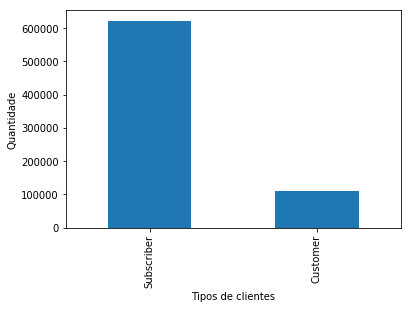

In [20]:
# Quantidade de assinantes e não assinantes 
df_complete_data_not_duplicated['subscriber_type'].value_counts().plot(kind='bar')
plt.xlabel("Tipos de clientes")
plt.ylabel("Quantidade")
plt.show()

In [21]:
df_complete_data_not_duplicated.duplicated().sum()

0

In [22]:
df_complete_data_not_duplicated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731665 entries, 0 to 731664
Data columns (total 42 columns):
trip_id                       731665 non-null int64
duration                      731665 non-null float64
start_date                    731665 non-null datetime64[ns]
start_station                 731665 non-null object
start_terminal                731665 non-null int64
end_date                      731665 non-null datetime64[ns]
end_station                   731665 non-null object
end_terminal                  731665 non-null int64
bike_#                        731665 non-null int64
subscriber_type               731665 non-null object
zip_code_subscriber           724691 non-null object
date_weather                  325 non-null datetime64[ns]
max_temperature_f             731665 non-null float64
mean_temperature_f            731665 non-null float64
min_temperature_f             731665 non-null float64
max_dew_point_f               731665 non-null float64
mean_dew_point_f   

In [23]:
Customer = 'Customer'
df_Customer = df_complete_data_not_duplicated.query('subscriber_type == @Customer')
count_total = len(df_complete_data_not_duplicated)
count_Customer = len(df_Customer)
count_Subscriber = count_total - count_Customer

percent_Customer = 100*(count_Customer/count_total)
percent_Subscriber = 100*(count_Subscriber/count_total)
print(percent_Customer)
print(percent_Subscriber)

list_percent = [percent_Customer,percent_Subscriber]
list_labels = ["Customer","Subscriber"]

14.873473515885003
85.12652648411499


In [25]:
# comparar as estações que passaram por mudanças de localização, 
# a idéia é comparar os meses de mudança com os mesmos meses em outro ano quando estavam no lugar certo
de = '2014/09/01'
ate = '2014/10/22'
station_id = 23

station_23 = df_complete_data_not_duplicated.query('start_date >= @de and start_date <= @ate and station_id == @station_id')
print(len(station_23))

de_2 = '2013/09/01'
ate_2 = '2013/10/22'

station_23_antes = df_complete_data_not_duplicated.query('start_date >= @de_2 and start_date <= @ate_2 and station_id == @station_id')
print(len(station_23_antes))

lista_plotar = [station_23_antes,station_23]

30
94


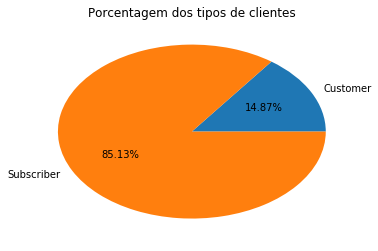

In [48]:
plt.pie(list_percent, labels=list_labels, autopct='%1.2f%%')
plt.title('Porcentagem dos tipos de clientes')
plt.show()

In [27]:
df_complete_data_not_duplicated.query('station_id == 23')[:1]

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscriber_type,...,weather_events,wind_dir_degrees,zip_code,station_id,name,lat,long,dockcount,landmark,installation
660527,4766,5.25,2013-08-29 17:05:00,San Mateo County Center,23,2013-08-29 17:10:00,San Mateo County Center,23,227,Subscriber,...,NaN,278.904274,NaN,23,San Mateo County Center,37.488501,-122.231061,15,Redwood City,2013-08-29 17:10:00


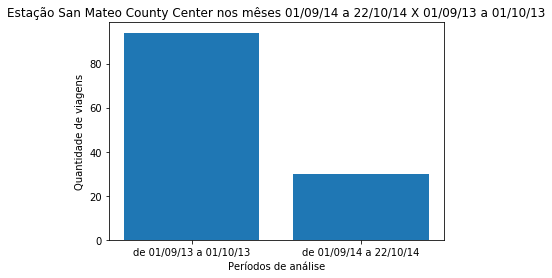

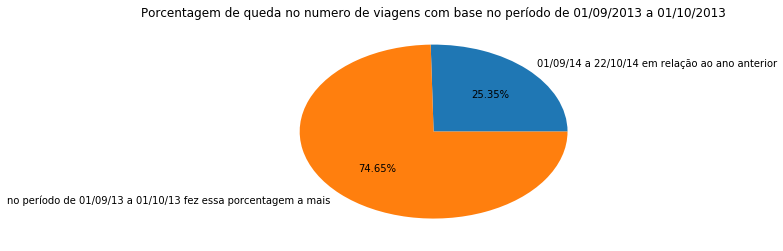

In [46]:
names = ['de 01/09/13 a 01/10/13', 'de 01/09/14 a 22/10/14']
values = [94,30]

plt.figure(1)
plt.subplot(111)
xs = [i + 0.5 for i, _ in enumerate(values)]
plt.bar(xs, values)
plt.title('Estação San Mateo County Center nos mêses 01/09/14 a 22/10/14 X 01/09/13 a 01/10/13')
plt.ylabel("Quantidade de viagens")
plt.xlabel("Períodos de análise")
plt.xticks([i + 0.5 for i, _ in enumerate(names)], names)

label = ["01/09/14 a 22/10/14 em relação ao ano anterior",\
         "no período de 01/09/13 a 01/10/13 fez essa porcentagem a mais"]
list_percent_2 = [percent,len(station_23_antes)]

plt.figure(2)

plt.pie(list_percent_2, labels=label, autopct='%1.2f%%')
plt.title('Porcentagem de queda no numero de viagens com base no período de 01/09/2013 a 01/10/2013')

plt.show()

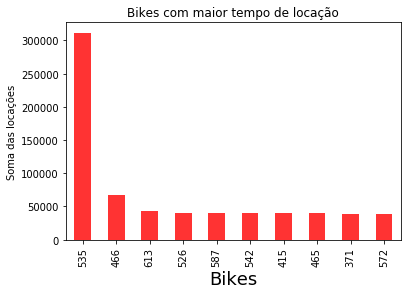

In [97]:
a = df_complete_data_not_duplicated.groupby('bike_#')['duration'].sum()
b = a.sort_values(ascending=False).head(10)

colors = ['red','brue'] 
b.plot(kind='bar',title='Bikes com maior tempo de locação', color=colors, alpha=.8)
plt.xlabel('Bikes',fontsize=18)
plt.ylabel('Soma das locações')
plt.show()

In [69]:
#df_complete_data_not_duplicated.sort_values(by=['bike_#']).groupby('bike_#')['duration'].sum()
df_complete_data_not_duplicated.head(2)

,trip_id,duration,start_date,start_station,start_terminal,end_date,end_station,end_terminal,bike_#,subscriber_type,...,weather_events,wind_dir_degrees,zip_code,station_id,name,lat,long,dockcount,landmark,installation
0,4576,1.050000,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,...,NaN,278.904274,NaN,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,2013-08-29 14:14:00
1,4299,1.383333,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,...,NaN,278.904274,NaN,66,South Van Ness at Market,37.774814,-122.418954,19,San Francisco,2013-08-29 12:04:00


# Pergunta 5a
Explore os dados e faça um gráfico que demonstre alguma particularidade dos dados:

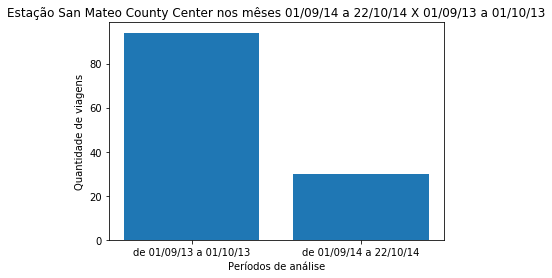

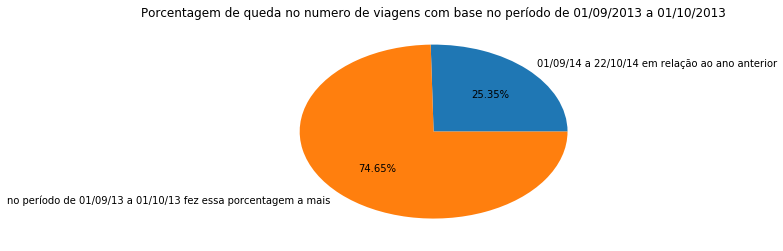

In [47]:
# Gráfico final 1
names = ['de 01/09/13 a 01/10/13', 'de 01/09/14 a 22/10/14']
values = [94,30]

plt.figure(1)
plt.subplot(111)
xs = [i + 0.5 for i, _ in enumerate(values)]
plt.bar(xs, values)
plt.title('Estação San Mateo County Center nos mêses 01/09/14 a 22/10/14 X 01/09/13 a 01/10/13')
plt.ylabel("Quantidade de viagens")
plt.xlabel("Períodos de análise")
plt.xticks([i + 0.5 for i, _ in enumerate(names)], names)

label = ["01/09/14 a 22/10/14 em relação ao ano anterior",\
         "no período de 01/09/13 a 01/10/13 fez essa porcentagem a mais"]
list_percent_2 = [percent,len(station_23_antes)]

plt.figure(2)

plt.pie(list_percent_2, labels=label, autopct='%1.2f%%')
plt.title('Porcentagem de queda no numero de viagens com base no período de 01/09/2013 a 01/10/2013')

plt.show()

O que é interessante na visualização acima? Por que você a selecionou?

**Answer**: <br/>O interessante é ver o quanto a mudança de localização influenciou na quantidade de viagens. <br/>
Acredito que a mudança se deu visando almentar o numero de viagens,<br/>
o que não aconteceu e pior houve uma queda muito grande o que é representado no gráfico de pizza mostrando a 
porcentagem de viagens feitas com base no ano de 2013.

# Pergunta 5b
Faça um gráfico que demonstre alguma particularidade dos dados:

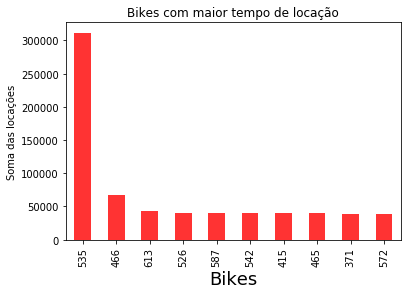

In [98]:
# Gráfico Final 2
a = df_complete_data_not_duplicated.groupby('bike_#')['duration'].sum()
b = a.sort_values(ascending=False).head(10)

colors = ['red','brue'] 
b.plot(kind='bar',title='Bikes com maior tempo de locação', color=colors, alpha=.8)
plt.xlabel('Bikes',fontsize=18)
plt.ylabel('Soma das locações')
plt.show()

O que é interessante na visualização acima? Por que você a selecionou?

**Answer**: <br/>É interessante ver que existem bikes que são muito mais usadas do que outras e isso concerteza significa menor vida util para as peças dessa bike, e claro que o cliente não vai gostar de que a bike quebre com ele em seu trajeto, então seria um bom ponto para a empresa prestar atenção. 

## Conclusões

Parabéns pela conclusão do projeto! Esta é apenas uma amostragem do processo de análise de dados: gerando perguntas, limpando e explorando os dados. Normalmente, neste momento no processo de análise de dados, você pode querer tirar conclusões realizando um teste estatístico ou ajustando os dados a um modelo para fazer previsões. Há também muitas análises potenciais que podem ser realizadas se evoluirmos o código fornecido. Em vez de apenas olhar para o número de viagens no eixo de resultados, você pode ver quais recursos afetam coisas como a duração da viagem. Nós também não analisamos como os dados meteorológicos se encaixam no uso de bicicletas.

# Pergunta 6
Pense em um tópico ou campo de interesse onde você gostaria de poder aplicar as técnicas da ciência dos dados. O que você gostaria de aprender com o assunto escolhido?

**Responda**: <br/>    Gostaria de aplicar essas técnicas em projetos de Open Data, seria um uso muito útil dessas técnicas, e com isso gostaria de aprender a minerar e a mostrar os dados relevantes.

> **Dica**: se quisermos compartilhar os resultados de nossa análise com os outros, existe uma outra opção que não é enviar o arquivo jupyter Notebook (.ipynb). Também podemos exportar a saída do Notebook de uma forma que pode ser aberto mesmo para aqueles sem o Python instalado. No menu **File** na parte superior esquerda, vá para o submenu **Download as**. Você pode então escolher um formato diferente que pode ser visto de forma mais geral, como HTML (.html) ou PDF (.pdf). Você pode precisar de pacotes adicionais ou software para executar essas exportações.